## Исследование надёжности заёмщиков

### Навигация по проекту
1. [Откройте файл с данными и изучите общую информацию.](#section1)
2. [Предобработка данных](#section2)
    - [Обработка пропусков](#section2_1)
    - [Замена типа данных](#section2_2)
    - [Обработка дубликатов](#section2_3)
    - [Лемматизация](#section2_4)
    - [Категоризация данных](#section2_5)
3. [Ответы на вопросы](#section3)
    - [Вопрос 1](#section3_1)
    - [Вопрос 2](#section3_2)
    - [Вопрос 3](#section3_3)
    - [Вопрос 4](#section3_4)
4. [Общий вывод](#section4)
5. [Чек-лист готовности проекта](#section5)

<a id='section1'></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
from collections import Counter 
from pymystem3 import Mystem
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('/datasets/data.csv')

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
data.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод

В данных имеется **12** признаков и **21525** объектов-строк. **7** признаков имеют численный тип данных, **5** - тип object. Признаки **education, education_id, family_status, family_status_id, gender** и **income_type** являются категориальными.\
<font color='red'> Добавлено:</font>\
    Признаки **days_employed** и **total_income** имеют пропуски - **2174**, также только эти два признака имеют тип **float64**. 

<a id='section2'></a>
### Шаг 2. Предобработка данных

<a id='section2_1'></a>
### Обработка пропусков

In [5]:
def emptys(df):
    for i in df.columns:
        empt = df[i].isna().sum()
        print("Признак = {:<17}: количество пропусков = {}".format(i,empt))
    print('---')

In [6]:
emptys(data)

Признак = children         : количество пропусков = 0
Признак = days_employed    : количество пропусков = 2174
Признак = dob_years        : количество пропусков = 0
Признак = education        : количество пропусков = 0
Признак = education_id     : количество пропусков = 0
Признак = family_status    : количество пропусков = 0
Признак = family_status_id : количество пропусков = 0
Признак = gender           : количество пропусков = 0
Признак = income_type      : количество пропусков = 0
Признак = debt             : количество пропусков = 0
Признак = total_income     : количество пропусков = 2174
Признак = purpose          : количество пропусков = 0
---


In [7]:
# Доработка

total = data.isnull().sum().sort_values(ascending=False) # переменная total, содержащая количество пропусков для каждого признака
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False) # доля пропусков для каждого признака
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total missing values', 'Percent %'])
missing_data['dtype'] = data.dtypes
missing_data

,Total missing values,Percent %,dtype
total_income,2174,0.100999,float64
days_employed,2174,0.100999,float64
purpose,0,0.000000,object
debt,0,0.000000,int64
income_type,0,0.000000,object
gender,0,0.000000,object
family_status_id,0,0.000000,int64
family_status,0,0.000000,object
education_id,0,0.000000,int64
education,0,0.000000,object


In [8]:
data['dob_years'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [9]:
# Разделим данные на возрастные категории: 0-33, 34-42, 43-53, 54-75

def age_group(age):
    if 0 <= age < 33:
        return '0-32'
    elif 33 <= age < 42:
        return '33-41'
    elif 42 <= age < 53:
        return '42-52'
    elif 53 <= age <= 75:
        return '53-75'
    
data['age_group'] = data['dob_years'].apply(age_group)

In [10]:
data['age_group'].value_counts()

53-75    5750
42-52    5601
33-41    5280
0-32     4894
Name: age_group, dtype: int64

In [11]:
data[data['days_employed'] < 0].shape

(15906, 13)

In [12]:
# заметим, что в столбце days_employed есть отрицательные значения, трудовой стаж - неотрицательная величина
# исправим это
data['days_employed'] = data['days_employed'].abs()
data[data['days_employed'] < 0].shape

(0, 13)

In [13]:
age_grouped = data.groupby('age_group').agg(['mean', 'median','std'])[['days_employed', 'total_income', 'debt']]
age_grouped

days_employed                                 total_income  \
                    mean         median            std           mean   
age_group                                                               
0-32         3646.836263    1120.131612   28416.660580  163345.998283   
33-41        5215.353893    1732.332401   33122.909370  178718.015585   
42-52       27569.407401    2368.904692   91328.489185  176061.182711   
53-75      216912.034888  340243.384325  178623.736265  152033.514617   

                                             debt                   
                  median            std      mean median       std  
age_group                                                           
0-32       144680.154149   88362.334075  0.110135      0  0.313090  
33-41      155562.307690  112942.264076  0.088447      0  0.283971  
42-52      152288.000969  111137.527735  0.072487      0  0.259316  
53-75      131376.488329   94189.262175  0.057217      0  0.232278

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


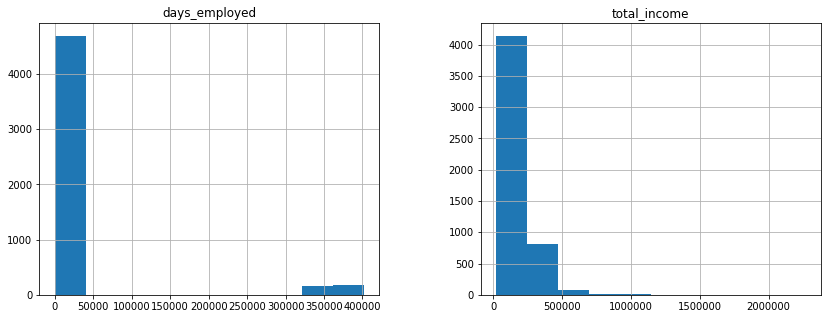

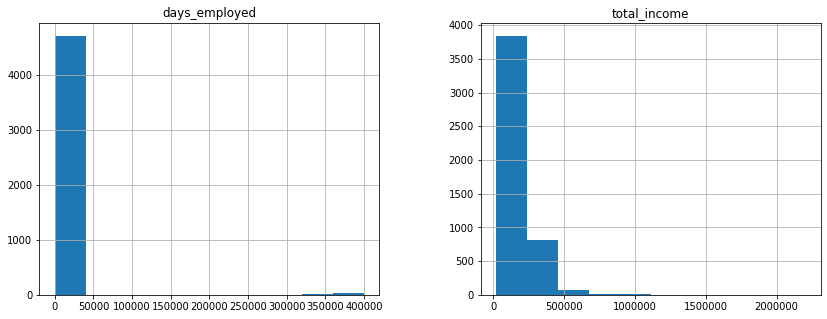

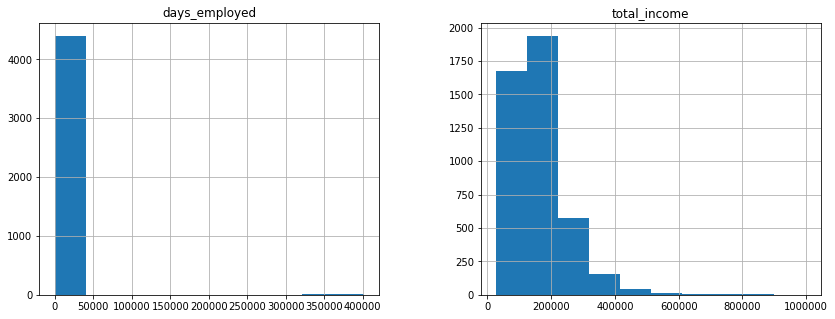

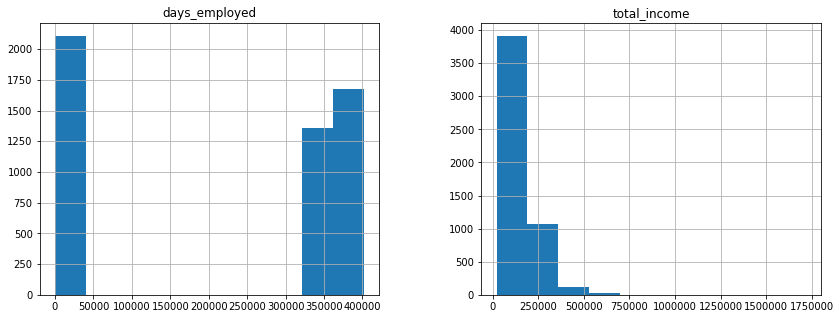

In [14]:
# посмотрим на распределение выборок для каждой возрастной категории

for group in data['age_group'].unique():
    fig, ax = plt.subplots(figsize=(14,5))
    part = data.loc[data['age_group'] == group, ['days_employed', 'total_income']]
    part.hist(ax=ax)

Как видно по графикам, для **первой** возрастной категории у признака **days_employed** есть аномалии, у **total_income** аномалий нет.\
Для **второй** категории: аналогично предыдущей.\
Для **третьей** категории: аналогично, при этом у признака **total_income** есть небольшой "хвост" (если я правильно выражаюсь). \
Для **четвертой** категории: аналогично.\
<font color='red'> **Как заполнить пропуски?** </font>\
Можно сделать вывод, что для столбца **days_employed** лучше использовать **медианное** значение, а для **total_income** - **среднее**. 

In [15]:
# заполним пропуски для каждой группы своим средним значением
for group in data['age_group'].unique():
    part = data.loc[data['age_group'] == group]
    days_employed_median = part['days_employed'].median()
    total_income_mean = part['total_income'].mean()
    
    data.loc[data['age_group'] == group, 'days_employed'] = part['days_employed'].fillna(days_employed_median) 
    data.loc[data['age_group'] == group, 'total_income'] = part['total_income'].fillna(total_income_mean)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  age_group         21525 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


### Вывод

Из всех признаков пропущенные значения имеют два признака - **days_employed** и **total_income** (эти признаки количественные). Они имеют одинаковое количество пропусков - **2174** (это примерно 10% от всего размера данных). Так как признаки количественные, то пропуски можно заполнить **средним** или **медианой**.\
Причинами появления пропусков в данных могут быть ошибки при выгрузке данных, возможно, человек сам не указал количество отработанных дней и свой общий заработок, поэтому у этих объектов есть пропуски.\
<font color='red'> **Исправлено:** </font> \
Я попробовал разделить данные по возрастным категориям, чтобы посмотреть, как возраст влияет на доход и стаж и влияет ли вообще. 
И в итоге заполнял пропуски, разделяя данные именно по возрастным категориям, так как, на мой взгляд, трудовой стаж более всего коррелирует с возрастом, также как и заработок, хотя с остальными критериями (например, тип занятости, возраст) данные признаки тоже могут коррелировать. \
**В итоге** - данные без пропущенных значений.\

<a id='section2_2'></a>
### Замена типа данных

In [17]:
# необходимо заменить вещественные типы данных на целочисленные
data['days_employed'] = data['days_employed'].astype('int')
data['total_income'] = data['total_income'].astype('int')

In [18]:
# посмотрим изменился ли тип данных у этих признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
 12  age_group         21525 non-null  object
dtypes: int64(7), object(6)
memory usage: 2.1+ MB


In [19]:
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,42-52
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,33-41
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,33-41


### Вывод

Вещественных признаков всего два - **days_employed** и **total_income**. Для приведения к целочисленному типу был использован метод *astype*, так как он понятен и нагляден (также можно было бы использовать метод *to_numeric*).

<a id='section2_3'></a>
### Обработка дубликатов

In [20]:
# посмотрим на уникальные значения столбцов 
def unique_values(df):
    for col in df.columns:
        print('Признак = {:<13}: уникальные значения = {}'.format(col,df[col].unique()))
        
obj_features = ['education', 'family_status', 'gender', 'income_type'] # кроме purpose
unique_values(data[obj_features])

Признак = education    : уникальные значения = ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
Признак = family_status: уникальные значения = ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
Признак = gender       : уникальные значения = ['F' 'M' 'XNA']
Признак = income_type  : уникальные значения = ['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']


In [21]:
# как можно заметить значения столбца education и family_status записаны в разном регистре, приведем их к нижнему регистру
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()

In [22]:
# проверка
print(data['education'].unique())
print(data['family_status'].unique())

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'не женат / не замужем']


In [23]:
# посмотрим на признак children 
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [24]:
# в данных есть аномалии - значения 20 и -1, удалим их
data = data.loc[(data['children'] != 20) & (data['children'] != -1)]

In [25]:
# найдем количество дубликатов 
data.duplicated().sum()

71

In [26]:
# удалим дубликаты, используя метод drop_duolicates
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum() # проверим

0

In [27]:
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,42-52
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,33-41
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,33-41


### Вывод

В данных был найден **71** дубликат (без приведения столбца **education** к нижнему регистру количество дубликатов равно **54**). Поиск дубликатов осуществлялся методом **duplicated** в связке с **sum**. Удаление произведено с помощью метода **drop_duplicates** в связке с методом **reset_index** для переиндексации объектов. Причины появления дубликатов могут быть разный формат записи, то есть наличие заглавных букв или одна и та же запись может быть представлена на разных языках (например, русском и английском). Также дубликаты могут иметь одинаковый/похожий смысл, например, "покупка жилья" и "покупка квартиры" имеют одинаковый смысл.\
Был приведен к нижнему регистру признак **family_status**, а также я удалил аномальные значения признака **children**, так как значения -1 и 20 похожи на ошибки, хотя 20 детей в принципе правдоподобно, но маловероятно. 

<a id='section2_4'></a>
### Лемматизация

In [28]:
m = Mystem()
data['purpose_new'] = data['purpose'].apply(lambda x: m.lemmatize(x))
data['purpose_new'].head()

0                 [покупка,  , жилье, \n]
1       [приобретение,  , автомобиль, \n]
2                 [покупка,  , жилье, \n]
3    [дополнительный,  , образование, \n]
4               [сыграть,  , свадьба, \n]
Name: purpose_new, dtype: object

In [29]:
new_list = data['purpose_new'].sum()
print(Counter(new_list))

Counter({' ': 33378, '\n': 21331, 'недвижимость': 6314, 'покупка': 5865, 'жилье': 4437, 'автомобиль': 4279, 'образование': 3988, 'с': 2900, 'операция': 2587, 'свадьба': 2313, 'свой': 2219, 'на': 2207, 'строительство': 1867, 'высокий': 1367, 'получение': 1309, 'коммерческий': 1303, 'для': 1286, 'жилой': 1222, 'сделка': 936, 'заниматься': 904, 'дополнительный': 899, 'проведение': 763, 'сыграть': 760, 'сдача': 649, 'семья': 637, 'собственный': 628, 'со': 623, 'ремонт': 604, 'подержанный': 481, 'подержать': 471, 'приобретение': 459, 'профильный': 432})


### Вывод

Как видно выше, была произведена лемматизация столбца **purpose** (цель кредита). Также было посчитано количество употреблений каждей леммы. Можно заметить, что наиболее употребляемые слова - **недвижимость, покупка, жилье, автомобиль**. Также можно заметить, что присутствуют синонимы, например, недвижимость и жилье одинаковые по смыслу слова.

<a id='section2_5'></a>
### Категоризация данных

In [30]:
# посмотрим на столбец total_income
data['total_income'].describe().astype('int')

count      21331
mean      167442
std        97980
min        20667
25%       107507
50%       152033
75%       195831
max      2265604
Name: total_income, dtype: int64

In [31]:
np.percentile(data['total_income'], 95)

331712.5

In [32]:
data['total_income'].isnull().sum()

0

In [33]:
# категоризируем данные по доходу
# создадим функцию, которая будет возвращать низкий, средний, высокий уровень дохода 
def alert_group(income):
    if income < 107507: # меньше 25% квартиля 
        return 'низкий'
    elif 107507 <= income < 152033: # 25-50% 
        return 'средний'
    elif 152033 <= income < 195831: # 50-75% 
        return 'выше среднего'
    elif 195831 <= income < 331713: # 75-95% 
        return 'высокий'
    return 'очень высокий' # более 95%

In [34]:
# проверим есть ли отрицательные значения в столбце дохода
data[data['total_income'] < 0]['total_income'].count()

0

In [35]:
# создадим новый столбец income_level
data['income_level'] = data['total_income'].apply(alert_group)

# теперь есть столбец с категориями уровня дохода, посмотрим на него
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,purpose_new,income_level
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,42-52,"[покупка, , жилье, \n]",высокий
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,33-41,"[приобретение, , автомобиль, \n]",средний
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,33-41,"[покупка, , жилье, \n]",средний


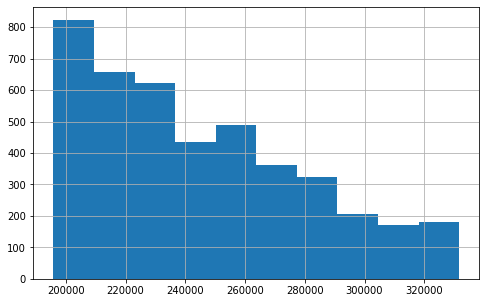

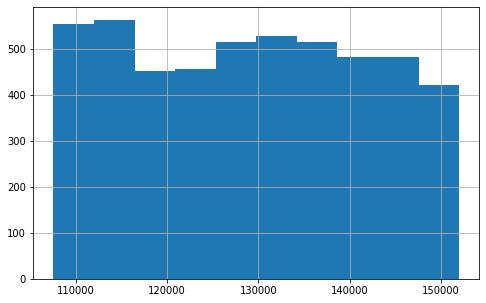

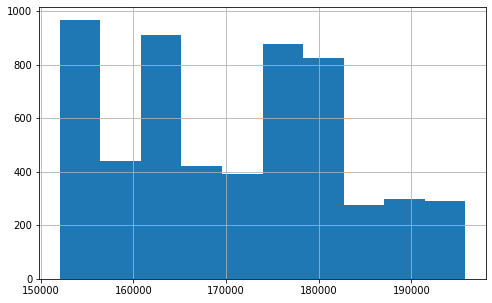

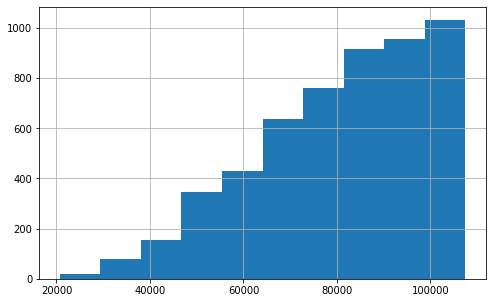

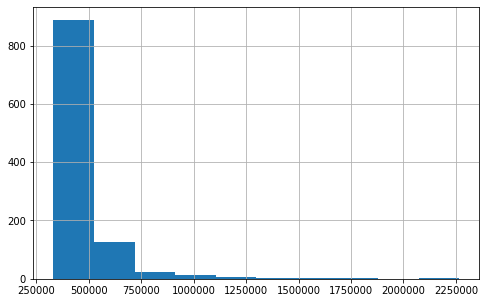

In [36]:
for lvl in data['income_level'].unique():
    part = data.loc[data['income_level'] == lvl, 'total_income']
    fig, ax = plt.subplots(figsize = (8,5))
    part.hist()

**Создадим еще один категоризированный столбец**

In [37]:
# используем столбец purpose_new (с леммами)
# создадим функцию аналогичную alert_group

def purpose_kind(purpose):
    if ('недвижимость' in purpose) or ('жилье' in purpose):
        return 'недвижимость'
    if 'автомобиль' in purpose:
        return 'автомобиль'
    if 'образование' in purpose:
        return 'образование'
    if 'свадьба' in purpose:
        return 'свадьба'
    return 'иное'

In [38]:
data['purpose_kind'] = data['purpose_new'].apply(purpose_kind)

In [39]:
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,purpose_new,income_level,purpose_kind
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,42-52,"[покупка, , жилье, \n]",высокий,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,33-41,"[приобретение, , автомобиль, \n]",средний,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,33-41,"[покупка, , жилье, \n]",средний,недвижимость


### Вывод

Таким образом, были созданы еще два дополнительных столбца, которые могут помочь нам в дальнейшем. Например, теперь намного удобнее смотреть на цель взятия кредита, делать различные группировки на основе нового столбца.

<a id='section3'></a>
### Шаг 3. Ответьте на вопросы

<a id='section3_1'></a>
- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [40]:
child_debt_true = data.loc[(data['children'] != 0) & (data['debt'] == 1)] # посмотрим какое количество объектов с детьми не вернули кредит в срок
child_debt_false = data.loc[(data['children'] != 0) & (data['debt'] == 0)] # посмотрим какое количество объектов с детьми вернули кредит в срок
child_debt_true_1 = data.loc[(data['children'] == 0) & (data['debt'] == 1)] # посмотрим какое количество объектов без детей не вернули кредит в срок
child_debt_false_1 = data.loc[(data['children'] == 0) & (data['debt'] == 0)] # посмотрим какое количество объектов без детей вернули кредит в срок

print('Количество объектов с детьми, имевших задолженности по возврату кредита:', child_debt_true.shape[0])
print('Количество объектов с детьми, не имевших задолженности по возврату кредита:', child_debt_false.shape[0])
print('Количество объектов без детей, имевших задолженности по возврату кредита:', child_debt_true_1.shape[0])
print('Количество объектов без детей, не имевших задолженности по возврату кредита:', child_debt_false_1.shape[0])
print(data.shape)

Количество объектов с детьми, имевших задолженности по возврату кредита: 669
Количество объектов с детьми, не имевших задолженности по возврату кредита: 6571
Количество объектов без детей, имевших задолженности по возврату кредита: 1063
Количество объектов без детей, не имевших задолженности по возврату кредита: 13028
(21331, 16)


In [51]:
df_pivot = data.pivot_table(index='children', columns='debt', values='total_income', aggfunc='count')
df_pivot

debt,0,1
children,,
0,13028.0,1063.0
1,4364.0,444.0
2,1858.0,194.0
3,303.0,27.0
4,37.0,4.0
5,9.0,NaN


In [53]:
df_pivot['ratio, %'] = ((df_pivot[1] / (df_pivot[0] + df_pivot[1])) * 100).round(1)
df_pivot.sort_values('ratio, %', ascending = False)

debt,0,1,"ratio, %"
children,,,
4,37.0,4.0,9.8
2,1858.0,194.0,9.5
1,4364.0,444.0,9.2
3,303.0,27.0,8.2
0,13028.0,1063.0,7.5
5,9.0,NaN,NaN


### Вывод

Как можно увидеть выше, людей **без детей** и **без задолженностей** по кредиту больше всего - **13028**. Далее идут объекты **с детьми** и **без задолженностей** - **6685**. Хуже всего возвращают кредит объекты **без детей** - **1063** (примерно 5% от общего числа). Ответ: зависимость есть. Нет детей - нет задолженностей.\
Самый больший процент невозврата кредита у объектов, имеющих 4 детей, хотя выборка очень маленькая. 
**P.S: дети - цветы жизни :)**

<a id='section3_2'></a>
- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [58]:
df_pivot = data.pivot_table(index='family_status', columns='debt', values='total_income', aggfunc='count')
df_pivot['ratio, %'] = ((df_pivot[1] / (df_pivot[0] + df_pivot[1])) * 100).round(1)
df_pivot.sort_values('ratio, %', ascending = False)

debt,0,1,"ratio, %"
family_status,,,
не женат / не замужем,2523,273,9.8
гражданский брак,3749,385,9.3
женат / замужем,11334,927,7.6
в разводе,1105,84,7.1
вдовец / вдова,888,63,6.6


### Вывод

Ответ: **зависимость есть**, так как объектов, которые имеют семейное положение **"женат/замужем"** и **не имели задолженностей** больше всего **11408** (примерно 53%). Такой результат логичен - муж и жена имеют доход больше, поэтому им легче платить по кредиту.\
При этом:
- 8% от общего числа женатых/замужних объектов не вернули кредит.
- 9.3% - аналогично для "гражданского брака".
- 6.6% - аналогично для "вдовец/вдова".
- 7.1% - аналогично для "в разводе".
- 9.8% - аналогично для "не женат/замужем".\

<a id='section3_3'></a>
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [62]:
df_pivot = data.pivot_table(index='income_level', columns='debt', values='total_income', aggfunc='count')
df_pivot['ratio, %'] = ((df_pivot[1] / (df_pivot[0] + df_pivot[1])) * 100).round(1)
df_pivot.sort_values('ratio, %', ascending = False)

debt,0,1,"ratio, %"
income_level,,,
средний,4532,435,8.8
выше среднего,5209,489,8.6
низкий,4906,427,8.0
высокий,3960,306,7.2
очень высокий,992,75,7.0


## Вывод

Получаем, что люди со средним уровнем дохода могу чаще всего не возвращать кредит, а люди с высоким уровнем дохода возвращают кредит чаще, что логично. **Ответ:** зависимость есть.

<a id='section3_4'></a>
- Как разные цели кредита влияют на его возврат в срок?

In [63]:
df_pivot = data.pivot_table(index='purpose_kind', columns='debt', values='total_income', aggfunc='count')
df_pivot['ratio, %'] = ((df_pivot[1] / (df_pivot[0] + df_pivot[1])) * 100).round(1)
df_pivot.sort_values('ratio, %', ascending = False)

debt,0,1,"ratio, %"
purpose_kind,,,
автомобиль,3879,400,9.3
образование,3619,369,9.3
свадьба,2130,183,7.9
недвижимость,9971,780,7.3


### Вывод

Интересный факт: люди, которые берут кредит на автомобиль и образование, чаще остальных не возвращают кредит, а процент невозврата у людей, берущих кредит на недвижимость, самый низкий несмотря на то, что это самая большая категория (думал, что среди этой категории процент невозврата будет больше всего). **Ответ:** зависимость есть.

Также в этой части я привел тебе способ оптимизации твоих решений, попробуй воспользоваться им, думаю у тебя точно получится!)

<a id='section4'></a>
### Шаг 4. Общий вывод

В конечном итоге мною были проанализированы данные статистики о платежеспособности клиентов банка. На первом этапе был проведен первичный взгляд на данные. Далее они были обработаны: найдены дубликаты, пропуски, некорректные значения, а также данные были категоризированы по различным признакам и условиям (уровень дохода, количество детей, возраст, семейное положение). После чего был проведен конечный анализ для ответа на вопрос "есть ли зависимость между невозвратом кредита и различными признаками". Так, было определено, что зависимость возврата кредита от семейного положения и количества детей существует.